In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Remove Warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the data
df=pd.read_csv('TSLA.csv')

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2021-08-30,714.719971,731.000000,712.729980,730.909973,730.909973,18604200
247,2021-08-31,733.000000,740.390015,726.440002,735.719971,735.719971,20855400
248,2021-09-01,734.080017,741.989990,731.270020,734.090027,734.090027,13204300
249,2021-09-02,734.500000,740.969971,730.539978,732.390015,732.390015,12777300
250,2021-09-03,732.250000,734.000000,724.200012,733.570007,733.570007,15246100


In [3]:
# Check null Values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
#changing the index value of date
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-09-08 to 2021-09-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [5]:
from pandas import to_datetime

df['Date']=pd.to_datetime(to_datetime(df['Date']))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-09-08 to 2021-09-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


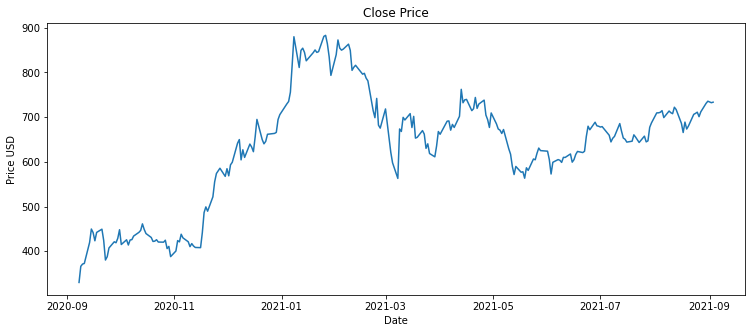

In [6]:
#visualizing stock price
plt.figure(figsize=(12.5,5))
plt.plot(df['Close'],label='Close')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.show()

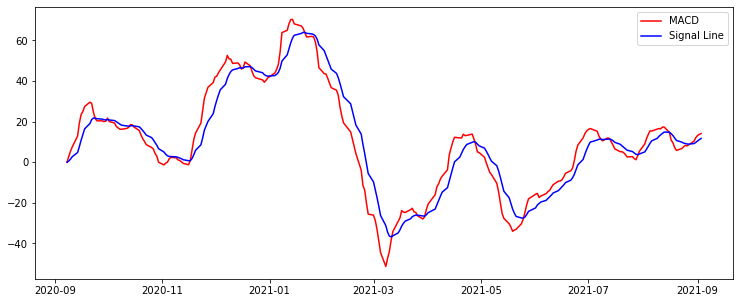

In [7]:
#calculating MACF and signal line indicaters
shortema=df['Close'].ewm(span=12,adjust=False).mean()
longema=df.Close.ewm(span=26,adjust=False).mean()
#macd line
macd=shortema-longema
#signal line
signal=macd.ewm(span=9,adjust=False).mean()


#ploting the graph
plt.figure(figsize=(12.5,5))
plt.plot(df.index,macd,label='MACD',color='red')
plt.plot(df.index,signal,label='Signal Line',color='blue')
plt.legend(loc='upper right')
plt.show()

In [8]:
#inserting macd and signal value in dataframe
df['MACD']=macd
df['Signal']=signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,0.000000,0.000000
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,2.877380,0.575476
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,5.502593,1.560899
2020-09-11,2020-09-11,381.940002,382.500000,360.500000,372.720001,372.720001,60717500,7.606762,2.770072
2020-09-14,2020-09-14,380.950012,420.000000,373.299988,419.619995,419.619995,83020600,12.909951,4.798047
...,...,...,...,...,...,...,...,...,...
2021-08-30,2021-08-30,714.719971,731.000000,712.729980,730.909973,730.909973,18604200,10.427657,9.213903
2021-08-31,2021-08-31,733.000000,740.390015,726.440002,735.719971,735.719971,20855400,12.134118,9.797946
2021-09-01,2021-09-01,734.080017,741.989990,731.270020,734.090027,734.090027,13204300,13.202785,10.478914
2021-09-02,2021-09-02,734.500000,740.969971,730.539978,732.390015,732.390015,12777300,13.753987,11.133928


In [9]:
#buy and sell value determination
def bs(a):
    buy,sell=[],[]
    
    flag=-1
    for i in range(0,len(a)):
        if a['MACD'][i]>a['Signal'][i]:
            sell.append(np.nan)
            if flag!=1:
                buy.append(a['Close'][i])
                flag=1
            else:
                buy.append(np.nan)
        elif a['MACD'][i]<a['Signal'][i]:
            buy.append(np.nan)
            if flag!=0:
                sell.append(a['Close'][i])
                flag=0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return(buy,sell)

x=bs(df)
df['Buy signal']=x[0]
df['Sell signal']=x[1]

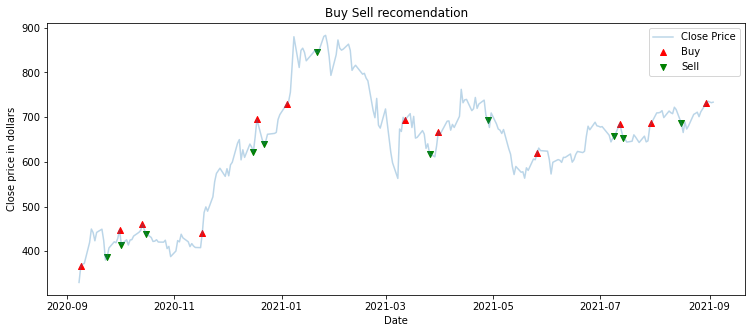

In [10]:
#buy sell recomendation
plt.figure(figsize=(12.5,5))
plt.scatter(df.index,df['Buy signal'],color='red',label='Buy',marker='^',alpha=1)
plt.scatter(df.index,df['Sell signal'],color='green',label='Sell',marker='v',alpha=1)
plt.plot(df['Close'],label='Close Price',alpha=0.3)
plt.title('Buy Sell recomendation')
plt.xlabel('Date')
plt.ylabel('Close price in dollars')
plt.legend()
plt.show()

In [11]:
#he pandas dataframe object does not have the iplot method when 
#it isn't linked to plotly. We need cufflinks to link pandas to plotly 
#and add the iplot method
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [12]:
#histogram of close price in terms of its frequency
plt.figure(figsize=(12.5,5))
df["Close"].iplot(kind="histogram", bins=30, theme="white", title="Close price",xTitle='Close');

<Figure size 900x360 with 0 Axes>

In [13]:
df[["Signal","MACD"]].iplot(kind="histogram", bins=50, theme="white", title="Indicator",yTitle='Count')
